In [ ]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers

2.2.0


## *AutoEncoder with MLP*

4423680/4422102 [==============================] - 0s 0us/step


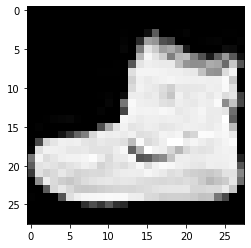

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255
train_images = train_images.reshape([-1, 784])
test_images = test_images.reshape([-1, 784])

In [ ]:
inputs = keras.Input(shape=(784,), name='digits')
x1 = layers.Dense(512, activation='relu', name='dense_1')(inputs)
x2 = layers.Dense(256, activation='relu', name='dense_2')(x1)
x3 = layers.Dense(128, activation='relu', name='dense_3')(x2)
x4 = layers.Dense(64, activation='relu', name='dense_4')(x3)
x5 = layers.Dense(32, activation='relu', name='dense_5')(x4)
x6 = layers.Dense(32, activation='relu', name='dense_6')(x5)
x7 = layers.Dense(64, activation='relu', name='dense_7')(x6)
x8 = layers.Dense(128, activation='relu', name='dense_8')(x7)
x9 = layers.Dense(256, activation='relu', name='dense_9')(x8)
x10 = layers.Dense(512, activation='relu', name='encoder')(x9)

encoder = keras.Model(inputs=inputs, outputs=x10,name='Encoder')
# encoder.summary()




AutoEncoder with *Relu*

In [ ]:
encoder.reset_states()
encoder_input = keras.Input(shape=(512,), name='encoded_inputs')
decoded_layer = layers.Dense(784,activation='relu',name='predictions')(encoder_input)
decoder = keras.Model(inputs=encoder_input, outputs=decoded_layer)

#Autoencoder
autoencoder=keras.Model(inputs=inputs, outputs=decoder(encoder(inputs)))


#Training 
autoencoder.compile(optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError()])

autoencoder.fit(train_images, train_images,
                epochs=20,batch_size=64)

#Testing
decoded_image_relu = autoencoder.predict(test_images)

Epoch 1/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0515
Epoch 2/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0278
Epoch 3/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0235
Epoch 4/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0218
Epoch 5/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0204
Epoch 6/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0195
Epoch 7/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0189
Epoch 8/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0184
Epoch 9/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0180
Epoch 10/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0176
Epoch 11/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0173
Epoch 12/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0170
Epoch 13/20
938/938 [====

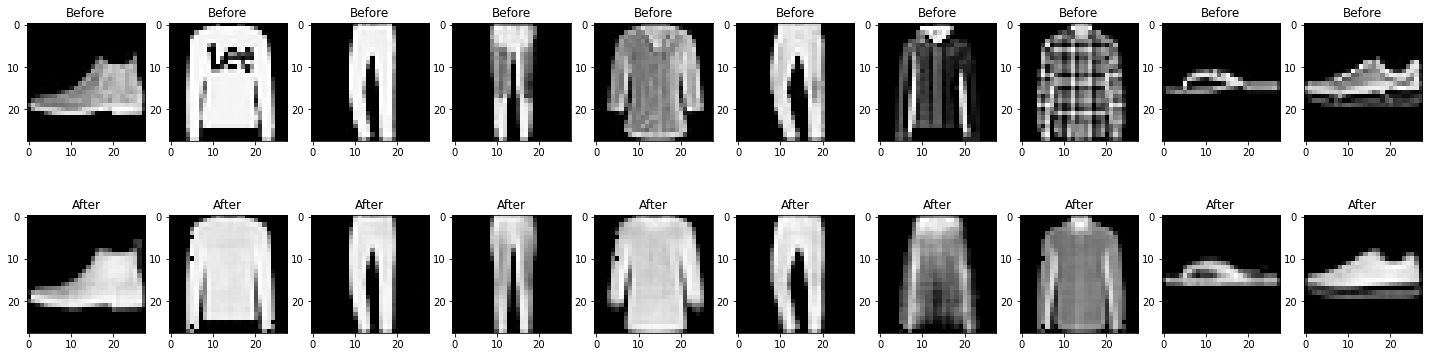

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(25,10))
for i in range (10):
  raw_input = plt.subplot(3,10, i+1)
  imgplot = plt.imshow(test_images[i].reshape(28, 28), cmap="Greys_r")
  raw_input.set_title('Before')

  decoded = plt.subplot(3, 10, i+1+10)
  imgplot = plt.imshow(decoded_image_relu[i].reshape(28, 28), cmap="Greys_r")
  decoded.set_title('After')


AutoEncoder with *Sigmoid*

In [ ]:
encoder.reset_states()
encoder_input = keras.Input(shape=(512,), name='encoded_inputs')
decoded_layer = layers.Dense(784,activation='sigmoid',name='predictions')(encoder_input)
decoder = keras.Model(inputs=encoder_input, outputs=decoded_layer)

#Autoencoder
autoencoder=keras.Model(inputs=inputs, outputs=decoder(encoder(inputs)))


#Training 
autoencoder.compile(optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.BinaryCrossentropy()])

autoencoder.fit(train_images, train_images,
                epochs=20,batch_size=64)

#Testing
decoded_image_sigmoid = autoencoder.predict(test_images)

Epoch 1/20
938/938 [==============================] - 8s 9ms/step - loss: 0.3034
Epoch 2/20
938/938 [==============================] - 8s 9ms/step - loss: 0.2877
Epoch 3/20
938/938 [==============================] - 8s 9ms/step - loss: 0.2852
Epoch 4/20
938/938 [==============================] - 8s 9ms/step - loss: 0.2839
Epoch 5/20
938/938 [==============================] - 8s 8ms/step - loss: 0.2830
Epoch 6/20
938/938 [==============================] - 8s 8ms/step - loss: 0.2824
Epoch 7/20
938/938 [==============================] - 8s 8ms/step - loss: 0.2819
Epoch 8/20
938/938 [==============================] - 8s 8ms/step - loss: 0.2815
Epoch 9/20
938/938 [==============================] - 8s 8ms/step - loss: 0.2811
Epoch 10/20
938/938 [==============================] - 8s 8ms/step - loss: 0.2808
Epoch 11/20
938/938 [==============================] - 8s 8ms/step - loss: 0.2806
Epoch 12/20
938/938 [==============================] - 8s 8ms/step - loss: 0.2803
Epoch 13/20
938/938 [====

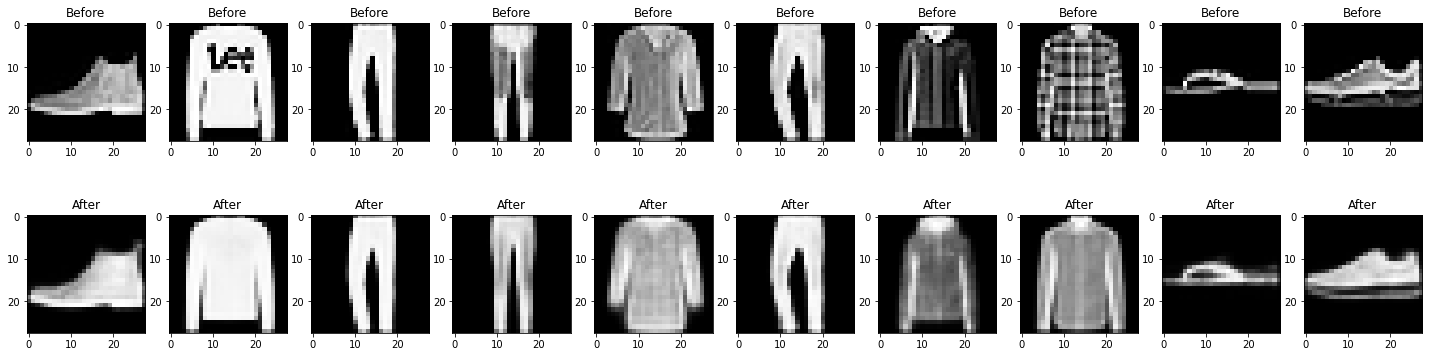

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(25,10))
for i in range (10):
  raw_input = plt.subplot(3,10, i+1)
  imgplot = plt.imshow(test_images[i].reshape(28, 28), cmap="Greys_r")
  raw_input.set_title('Before')

  decoded = plt.subplot(3, 10, i+1+10)
  imgplot = plt.imshow(decoded_image_sigmoid[i].reshape(28, 28), cmap="Greys_r")
  decoded.set_title('After')


AutoEncoder with *No Activation*

In [ ]:
encoder.reset_states()
encoder_input = keras.Input(shape=(512,), name='encoded_inputs')
decoded_layer = layers.Dense(784,name='predictions')(encoder_input)
decoder = keras.Model(inputs=encoder_input, outputs=decoded_layer)

#Autoencoder
autoencoder=keras.Model(inputs=inputs, outputs=decoder(encoder(inputs)))


#Training 
autoencoder.compile(optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError()])

autoencoder.fit(train_images, train_images,
                epochs=20,batch_size=64)

#Testing
decoded_image = autoencoder.predict(test_images)

Epoch 1/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0221
Epoch 2/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0168
Epoch 3/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0158
Epoch 4/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0153
Epoch 5/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0150
Epoch 6/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0147
Epoch 7/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0145
Epoch 8/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0144
Epoch 9/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0143
Epoch 10/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0142
Epoch 11/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0141
Epoch 12/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0140
Epoch 13/20
938/938 [====

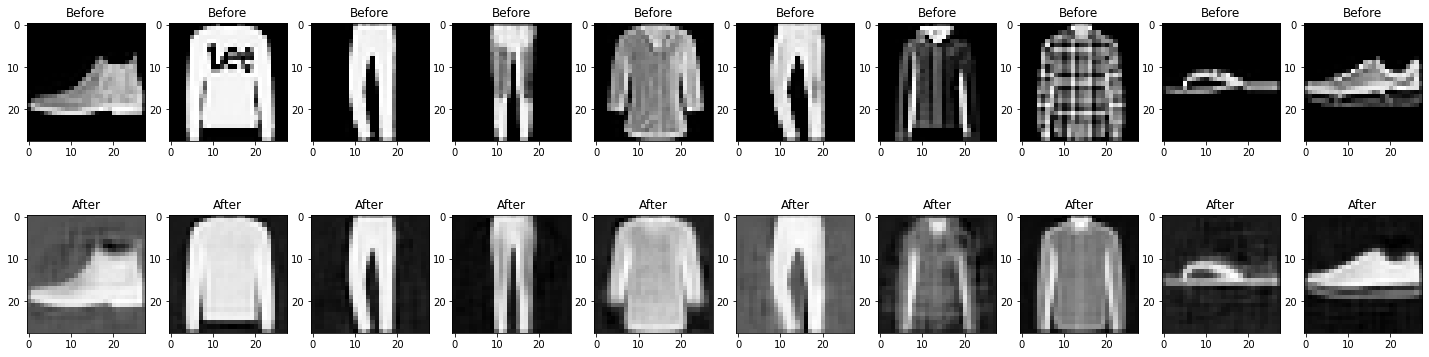

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(25,10))
for i in range (10):
  raw_input = plt.subplot(3,10, i+1)
  imgplot = plt.imshow(test_images[i].reshape(28, 28), cmap="Greys_r")
  raw_input.set_title('Before')

  decoded = plt.subplot(3, 10, i+1+10)
  imgplot = plt.imshow(decoded_image[i].reshape(28, 28), cmap="Greys_r")
  decoded.set_title('After')


## *AutoEncoder with CNN*

9


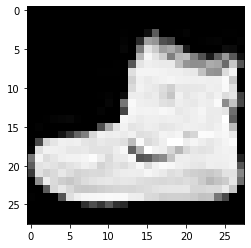

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

# first difference: data is not reshaped to 784 anymore, but 28x28x1
# note the 1 color channel!! this is important
train_images = train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255
test_images =test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255

In [ ]:
from tensorflow.keras import datasets, layers, models
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(25, 3, activation='relu', input_shape=(28, 28, 1)))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(50,3, activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(625))
model.add(tf.keras.layers.Dense(28800, activation='relu'))
model.add(tf.keras.layers.Reshape((24,24,50)))
model.add(tf.keras.layers.Conv2DTranspose(25,3,activation='relu'))
model.add(tf.keras.layers.Conv2DTranspose(1,3,activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 25)        250       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 50)        11300     
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 625)               18000625  
_________________________________________________________________
dense_1 (Dense)              (None, 28800)             18028800  
_________________________________________________________________
reshape (Reshape)            (None, 24, 24, 50)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 26, 26, 25)        1

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss=keras.losses.MeanSquaredError())
model.fit(train_images, train_images,
          batch_size=64,
          epochs=20)

decoded_image = model.predict(test_images)

Epoch 1/20
938/938 [==============================] - 42s 45ms/step - loss: 0.1862
Epoch 2/20
938/938 [==============================] - 42s 45ms/step - loss: 0.0086
Epoch 3/20
938/938 [==============================] - 42s 45ms/step - loss: 0.0055
Epoch 4/20
938/938 [==============================] - 42s 45ms/step - loss: 0.0041
Epoch 5/20
938/938 [==============================] - 42s 45ms/step - loss: 0.0033
Epoch 6/20
938/938 [==============================] - 42s 45ms/step - loss: 0.0028
Epoch 7/20
938/938 [==============================] - 42s 45ms/step - loss: 0.0024
Epoch 8/20
938/938 [==============================] - 42s 45ms/step - loss: 0.0021
Epoch 9/20
938/938 [==============================] - 42s 45ms/step - loss: 0.0019
Epoch 10/20
938/938 [==============================] - 42s 45ms/step - loss: 0.0017
Epoch 11/20
938/938 [==============================] - 42s 45ms/step - loss: 0.0016
Epoch 12/20
938/938 [==============================] - 42s 44ms/step - loss: 0.0015
E

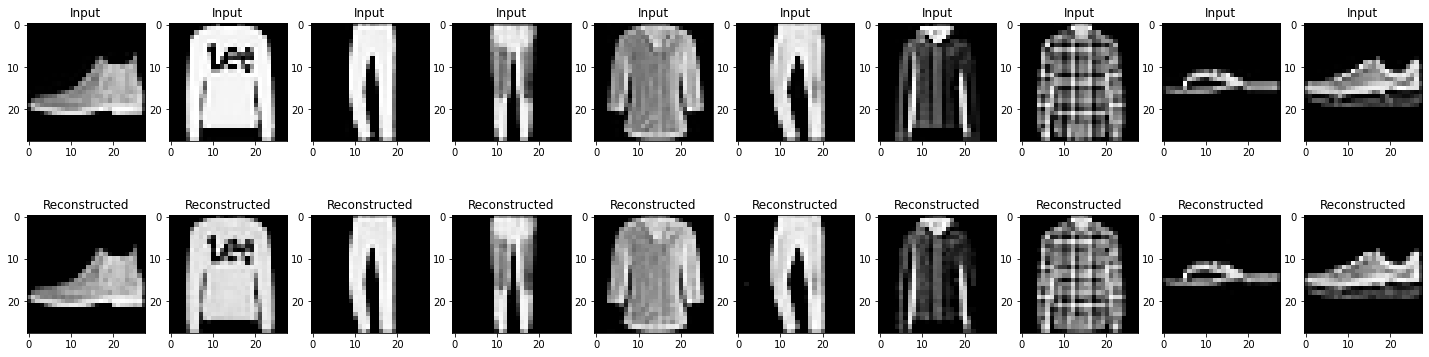

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(25,10))
for i in range (10):
  raw_input = plt.subplot(3,10, i+1)
  imgplot = plt.imshow(test_images[i].reshape(28, 28), cmap="Greys_r")
  raw_input.set_title('Input')

  decoded = plt.subplot(3, 10, i+1+10)
  imgplot = plt.imshow(decoded_image[i].reshape(28, 28), cmap="Greys_r")
  decoded.set_title('Reconstructed')


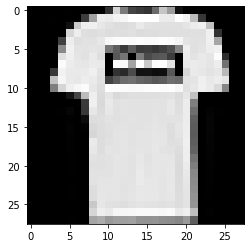

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.imshow(train_images[1], cmap="Greys_r")

train_images = train_images[1].astype('float32')/255
test_images = test_images.astype('float32')/255
train_images = train_images.reshape([-1, 784])
test_images = test_images.reshape([-1, 784])

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
def model_build(n):
  inputs = keras.Input(shape=(784,), name='digits')
  dense_1 = layers.Dense(n,activation='relu' )(inputs)
  dense_2 = layers.Dense(n+100,activation='relu' )(dense_1)
  
  decoded_layer = layers.Dense(784, activation='relu',name='predictions')(dense_1)
  model = keras.Model(inputs=inputs, outputs=decoded_layer)
  model_output=model(train_images)
  return tf.reshape(model_output,[28,28])

fifty_dense=model_build(50)
thirtytwo_dense=model_build(32)
threeh_dense=model_build(300)
sevenh_dense=model_build(700)

Text(0.5, 1.0, 'Dim=700')

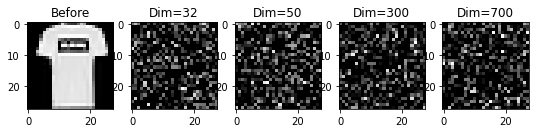

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(9,4))

a = plt.subplot(2, 5, 1)
imgplot = plt.imshow(train_images.reshape(28, 28), cmap="Greys_r")
a.set_title('Before')

a = plt.subplot(2, 5, 2)
imgplot = plt.imshow(thirtytwo_dense, cmap="Greys_r")
a.set_title('Dim=32')
a = plt.subplot(2, 5, 3)
imgplot = plt.imshow(fifty_dense, cmap="Greys_r")
a.set_title('Dim=50')

a = plt.subplot(2, 5, 4)
imgplot = plt.imshow(threeh_dense, cmap="Greys_r")
a.set_title('Dim=300')

a = plt.subplot(2, 5, 5)
imgplot = plt.imshow(sevenh_dense, cmap="Greys_r")
a.set_title('Dim=700')


In [ ]:
def dynamic_model(x):
  model.add(tf.keras.layers.Dense(x,activation='relu'))


In [ ]:
decoded_image=[]
dims =784
for i in range (10):
  dims =784
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(784, input_shape=(784,)))
  for j in range(i):
    if(j<=5):
      # dims-=20
      dynamic_model(dims/2)
    else:
      # dims+=50
      dynamic_model(dims*2)
  model.add(tf.keras.layers.Dense(784,activation='relu'))
  model.compile()

  decoded_image.append(model(train_images))


decoded_image_final=[]
for i in range(10):
  decoded_image_final.append(tf.reshape(decoded_image[i],[28,28]))
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_65 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_66 (Dense)             (None, 392)               154056    
_________________________________________________________________
dense_67 (Dense)             (None, 392)               154056    
_________________________________________________________________
dense_68 (Dense)             (None, 392)               154056    
_________________________________________________________________
dense_69 (Dense)             (None, 392)               154056    
_________________________________________________________________
dense_70 (Dense)             (None, 392)             

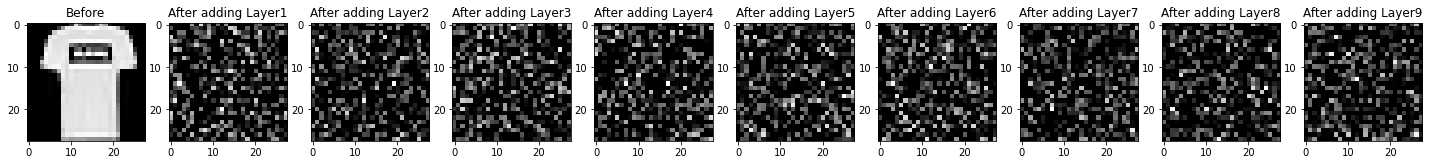

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(25,10))
raw_input = plt.subplot(1,10, 1)
imgplot = plt.imshow(train_images.reshape(28, 28), cmap="Greys_r")
raw_input.set_title('Before')

for i in range (1,10):
  decoded = plt.subplot(1, 10, i+1)
  imgplot = plt.imshow(decoded_image_final[i], cmap="Greys_r")
  decoded.set_title('After adding Layer'+str(i))

## *Unsupervised Pretraining*

Idea to concat models inspired from : https://www.pyimagesearch.com/2020/02/17/autoencoders-with-keras-tensorflow-and-deep-learning/

tf.Tensor([60000   784], shape=(2,), dtype=int32)
tf.Tensor([259 784], shape=(2,), dtype=int32)


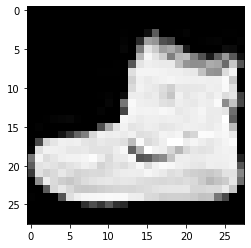

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255
train_images = train_images.reshape([-1, 784])
test_images = test_images.reshape([-1, 784])
print(tf.shape(train_images))

random = tf.random.uniform([],minval=100,maxval=300,dtype=tf.int32)


train_images_subset=train_images[:random.numpy()]
print(tf.shape(train_images_subset))
train_labels_subset=train_labels[:random.numpy()]

### *Train autoencoder – freeze encoder – train classifier on top*

In [ ]:
inputs = keras.Input(shape=(784,), name='digits')
x1 = layers.Dense(512, activation='relu', name='dense_1')(inputs)
x2 = layers.Dense(256, activation='relu', name='dense_2')(x1)
x3 = layers.Dense(128, activation='relu', name='dense_3')(x2)
x4 = layers.Dense(64, activation='relu', name='dense_4')(x3)
x5 = layers.Dense(32, activation='relu', name='dense_5')(x4)
x6 = layers.Dense(32, activation='relu', name='dense_6')(x5)
x7 = layers.Dense(64, activation='relu', name='dense_7')(x6)
x8 = layers.Dense(128, activation='relu', name='dense_8')(x7)
x9 = layers.Dense(256, activation='relu', name='dense_9')(x8)
x10 = layers.Dense(512, activation='relu', name='encoder')(x9)

encoder0 = keras.Model(inputs=inputs, outputs=x10,name='Encoder')
# encoder0.summary()
inputs_d = keras.Input(shape=(512,), name='encoded_digits')
decode = layers.Dense(784, activation='relu', name='dense_1')(inputs_d)
decoder0 = keras.Model(inputs = inputs_d,outputs = decode,name='Decoder')
# decoder0.summary()
autoencoder0 = keras.Model(inputs = inputs, outputs = decoder0(encoder0(inputs)),name = 'AutoEncoder')
# autoencoder0.summary()

autoencoder0.compile(optimizer= keras.optimizers.RMSprop(1e-3),loss = keras.losses.MeanSquaredError())
autoencoder0.fit(train_images,train_images,batch_size=64,epochs=20)


Epoch 1/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0515
Epoch 2/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0282
Epoch 3/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0240
Epoch 4/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0217
Epoch 5/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0200
Epoch 6/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0190
Epoch 7/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0182
Epoch 8/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0177
Epoch 9/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0173
Epoch 10/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0170
Epoch 11/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0167
Epoch 12/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0165
Epoch 13/20
938/938 [====

In [ ]:
inputs_c = keras.Input(shape=(512,), name='encoded__classified_digits')
c1 = layers.Dense(256, activation='relu', name='dense_1_c')(inputs_c)
c2 = layers.Dense(10, activation='relu', name='dense_2_c')(c1)
classifier0 = keras.Model(inputs=inputs_c,outputs=c2)
# classifier.summary()
encoder0.trainable=False # freezing the encoder weights 

encoder_classifier0=keras.Model(inputs=inputs,outputs=classifier0(encoder0(inputs)),name='EC')
encoder_classifier0.compile(optimizer= keras.optimizers.RMSprop(1e-3),loss = keras.losses.SparseCategoricalCrossentropy(),metrics=['sparse_categorical_accuracy'])
# encoder_classifier0.summary()
encoder_classifier0.fit(train_images_subset,train_labels_subset,batch_size=20,epochs=20)

Epoch 1/20
13/13 [==============================] - 0s 4ms/step - loss: 4.2565 - sparse_categorical_accuracy: 0.4479
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 1.8108 - sparse_categorical_accuracy: 0.4788
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 1.6895 - sparse_categorical_accuracy: 0.4788
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 1.6345 - sparse_categorical_accuracy: 0.4595
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 1.6607 - sparse_categorical_accuracy: 0.4131
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 1.6447 - sparse_categorical_accuracy: 0.4015
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 1.6447 - sparse_categorical_accuracy: 0.4015
Epoch 8/20
13/13 [==============================] - 0s 5ms/step - loss: 1.7006 - sparse_categorical_accuracy: 0.3938
Epoch 9/20
13/13 [==============================] - 0s 4ms/step 

In [ ]:
results = encoder_classifier0.evaluate(test_images, test_labels)
print('test loss, test acc:', results)

313/313 [==============================] - 1s 3ms/step - loss: 1.9392 - sparse_categorical_accuracy: 0.3514
test loss, test acc: [1.939199447631836, 0.3513999879360199]


### *Train autoencoder – train classifier on top of encoder. Encoder is “fine-tuned” on the labeled subset of data.*

In [ ]:
inputs = keras.Input(shape=(784,), name='digits')
x1 = layers.Dense(512, activation='relu', name='dense_1')(inputs)
x2 = layers.Dense(256, activation='relu', name='dense_2')(x1)
x3 = layers.Dense(128, activation='relu', name='dense_3')(x2)
x4 = layers.Dense(64, activation='relu', name='dense_4')(x3)
x5 = layers.Dense(32, activation='relu', name='dense_5')(x4)
x6 = layers.Dense(32, activation='relu', name='dense_6')(x5)
x7 = layers.Dense(64, activation='relu', name='dense_7')(x6)
x8 = layers.Dense(128, activation='relu', name='dense_8')(x7)
x9 = layers.Dense(256, activation='relu', name='dense_9')(x8)
x10 = layers.Dense(512, activation='relu', name='encoder')(x9)

encoder = keras.Model(inputs=inputs, outputs=x10,name='Encoder')
# encoder.summary()
inputs_d = keras.Input(shape=(512,), name='encoded_digits')
decode = layers.Dense(784, activation='relu', name='dense_1')(inputs_d)
decoder = keras.Model(inputs = inputs_d,outputs = decode,name='Decoder')
# decoder.summary()
autoencoder = keras.Model(inputs = inputs, outputs = decoder(encoder(inputs)),name = 'AutoEncoder')
# autoencoder.summary()

autoencoder.compile(optimizer= keras.optimizers.RMSprop(1e-3),loss = keras.losses.MeanSquaredError())
autoencoder.fit(train_images,train_images,batch_size=64,epochs=20)

Epoch 1/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0520
Epoch 2/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0286
Epoch 3/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0244
Epoch 4/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0221
Epoch 5/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0207
Epoch 6/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0198
Epoch 7/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0191
Epoch 8/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0182
Epoch 9/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0176
Epoch 10/20
938/938 [==============================] - 7s 8ms/step - loss: 0.0172
Epoch 11/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0169
Epoch 12/20
938/938 [==============================] - 8s 8ms/step - loss: 0.0167
Epoch 13/20
938/938 [====

In [ ]:
inputs_c = keras.Input(shape=(512,), name='encoded__classified_digits')
c1 = layers.Dense(256, activation='relu', name='dense_1_c')(inputs_c)
c2 = layers.Dense(10, activation='relu', name='dense_2_c')(c1)
classifier = keras.Model(inputs=inputs_c,outputs=c2)
# classifier.summary()

encoder_classifier=keras.Model(inputs=inputs,outputs=classifier(encoder(inputs)),name='EC')
encoder_classifier.compile(optimizer= keras.optimizers.RMSprop(1e-3),loss = keras.losses.SparseCategoricalCrossentropy(),metrics=['sparse_categorical_accuracy'])
# encoder_classifier.summary()
encoder_classifier.fit(train_images_subset,train_labels_subset,batch_size=64,epochs=20)


Epoch 1/20
5/5 [==============================] - 0s 7ms/step - loss: 5.0701 - sparse_categorical_accuracy: 0.2394
Epoch 2/20
5/5 [==============================] - 0s 6ms/step - loss: 2.2159 - sparse_categorical_accuracy: 0.2046
Epoch 3/20
5/5 [==============================] - 0s 6ms/step - loss: 2.1337 - sparse_categorical_accuracy: 0.1892
Epoch 4/20
5/5 [==============================] - 0s 6ms/step - loss: 2.1337 - sparse_categorical_accuracy: 0.1892
Epoch 5/20
5/5 [==============================] - 0s 6ms/step - loss: 2.1337 - sparse_categorical_accuracy: 0.1892
Epoch 6/20
5/5 [==============================] - 0s 6ms/step - loss: 2.1337 - sparse_categorical_accuracy: 0.1892
Epoch 7/20
5/5 [==============================] - 0s 7ms/step - loss: 2.1337 - sparse_categorical_accuracy: 0.1892
Epoch 8/20
5/5 [==============================] - 0s 6ms/step - loss: 2.1709 - sparse_categorical_accuracy: 0.1931
Epoch 9/20
5/5 [==============================] - 0s 6ms/step - loss: 2.1248 - s

In [ ]:
results = encoder_classifier.evaluate(test_images, test_labels)
print('test loss, test acc:', results)

313/313 [==============================] - 1s 3ms/step - loss: 2.1913 - sparse_categorical_accuracy: 0.1732
test loss, test acc: [2.1913187503814697, 0.17319999635219574]


### *Train a classifier directly on the labeled subset; no pretraining.*

In [ ]:
inputs = keras.Input(shape=(784,), name='digits')
x1 = layers.Dense(512, activation='relu', name='dense_1')(inputs)
x2 = layers.Dense(256, activation='relu', name='dense_2')(x1)
x3 = layers.Dense(128, activation='relu', name='dense_3')(x2)
x4 = layers.Dense(64, activation='relu', name='dense_4')(x3)
x5 = layers.Dense(32, activation='relu', name='dense_5')(x4)
x6 = layers.Dense(32, activation='relu', name='dense_6')(x5)
x7 = layers.Dense(64, activation='relu', name='dense_7')(x6)
x8 = layers.Dense(128, activation='relu', name='dense_8')(x7)
x9 = layers.Dense(256, activation='relu', name='dense_9')(x8)
x10 = layers.Dense(512, activation='relu', name='encoder')(x9)

encoder2 = keras.Model(inputs=inputs, outputs=x10,name='Encoder2')
encoder2.summary()

Model: "Encoder2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                105

In [ ]:
inputs_c2 = keras.Input(shape=(512,), name='encoded__classified_digits')
c1 = layers.Dense(256, activation='relu', name='dense_1_c')(inputs_c2)
c2 = layers.Dense(10, activation='relu', name='dense_2_c')(c1)
classifier2 = keras.Model(inputs=inputs_c2,outputs=c2)
classifier2.summary()

encoder_classifier2=keras.Model(inputs=inputs,outputs=classifier2(encoder2(inputs)),name='EC')
encoder_classifier2.compile(optimizer= keras.optimizers.RMSprop(1e-3),loss = keras.losses.SparseCategoricalCrossentropy(),metrics=['sparse_categorical_accuracy'])
encoder_classifier2.summary()
encoder_classifier2.fit(train_images_subset,train_labels_subset,batch_size=20,epochs=20)

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded__classified_digits ( [(None, 512)]             0         
_________________________________________________________________
dense_1_c (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_2_c (Dense)            (None, 10)                2570      
Total params: 133,898
Trainable params: 133,898
Non-trainable params: 0
_________________________________________________________________
Model: "EC"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
Encoder2 (Model)             (None, 512)               752576    
________________________________________

In [ ]:
results = encoder_classifier2.evaluate(test_images, test_labels)
print('test loss, test acc:', results)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000
test loss, test acc: [2.30259108543396, 0.10000000149011612]


# **Observation**

In the first approach we are freezing the weights of encoder and we get an accuracy of 35.1%. Here we capture some information from input train data but we dont update encoder weights while training the classifier. Hence the context which is learned by the encoder is preserved. The redundant information from the features get removed.

In the second approach when we train the encoder first as a part of AutoEncoder and then the classifier we get accuracy of 17.3% as we are overwriting the encoder weights now to include some redundant information from the training subset which we had discarded in the Autoencoder part.

In the final approach we dont train the encoder as a part of AutoEncoder,hence it behaves as a simple feedforward neural network classifier and our accuracy drops to 10% since there is no pretraining.